In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Speed%20Dating%20Experiment/Speed%20Dating%20Data.csv', encoding= 'unicode_escape')

In [3]:
fields = data.columns

print('Total number of people that participated, assuming person does not appear in more than one wave: {}'.format(len(data['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(data.index)))

Total number of people that participated, assuming person does not appear in more than one wave: 551
Total number of dates occurred: 8378


In [4]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.options.display.max_columns = None

data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fan night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}
frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}
data.head()

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.

In [6]:
data["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
data["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
data["match"].replace({1:"Yes",0:"No"}, inplace=True)
data["samerace"].replace({1:"Yes",0:"No"},inplace=True)
data["race of partner"].replace(race_replacement, inplace=True)
data["partner's decision"].replace(decision_replacement, inplace=True)
data["field_cd"].replace(field_replacement, inplace=True)
data["race"].replace(race_replacement, inplace=True)
data["career_c"].replace(career_replacement, inplace=True)
data["length"].replace(length_replacement, inplace=True)
data["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
data["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
data["goal"].replace(goal_replacement, inplace=True)
data["frequency of date"].replace(frequency_replacement, inplace=True)
data["go_out"].replace(frequency_replacement, inplace=True)

display(data)

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN

In [7]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)

,missing_values(%),missing_values(numbers)
num_in_3,92.026737,7710
numdat_3,82.143710,6882
date_3,82.119838,6880
expnum,78.515159,6578
sinc7_2,76.665075,6423
...,...,...
wave,0.000000,0
Condition,0.000000,0
idg,0.000000,0
Gender,0.000000,0


In [8]:
print(data.columns.tolist())

['iid', 'id', 'Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', "partner's decision", 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'median_sat', 'tuition', 'race', 'race importance', 'religion importance', 'originally from', 'zipcode', 'income', 'goal', 'frequency of date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 's

Avg. dates per male: 15.1		Avg. dates per female: 15.3
Avg. male match percentage: 20.3	Avg. female match percentage: 20.9


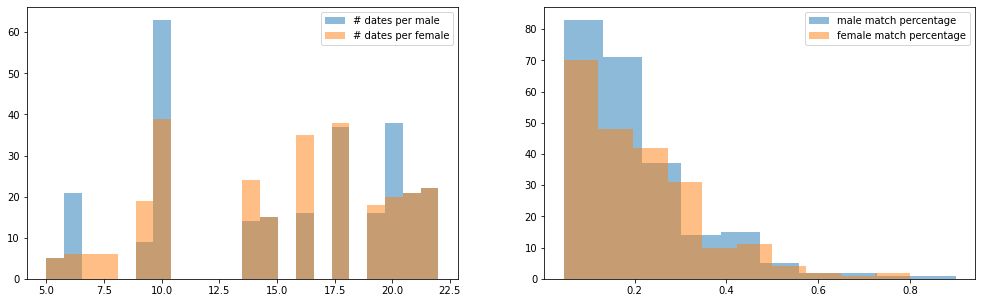

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(17,5))

num_dates_per_male = data[data.Gender == 'Male'].groupby('iid').apply(len)
num_dates_per_female = data[data.Gender == 'Female'].groupby('iid').apply(len)
axes[0].hist(num_dates_per_male, bins=22, alpha=0.5, label='# dates per male')
axes[0].hist(num_dates_per_female, bins=22, alpha=0.5, label='# dates per female')
axes[0].legend(loc='upper right')

matches = data[data.match == "Yes"]
matches_male = matches[matches.Gender == 'Male'].groupby('iid').apply(len)
matches_female = matches[matches.Gender == 'Female'].groupby('iid').apply(len)
axes[1].hist((matches_male / num_dates_per_male).dropna(), alpha=0.5, label='male match percentage')
axes[1].hist((matches_female / num_dates_per_female).dropna(), alpha=0.5, label='female match percentage')
axes[1].legend(loc='upper right')

print('Avg. dates per male: {0:.1f}\t\tAvg. dates per female: {1:.1f}\nAvg. male match percentage: {2:.1f}\tAvg. female match percentage: {3:.1f}'.format(
        num_dates_per_male.mean(), 
        num_dates_per_female.mean(),
        (matches_male / num_dates_per_male).mean() * 100.0,
        (matches_female / num_dates_per_female).mean() * 100.0))

partner rating of attributes    1.000000
fun_o                           0.570183
like_o                          0.653525
Name: partner rating of attributes, dtype: float64

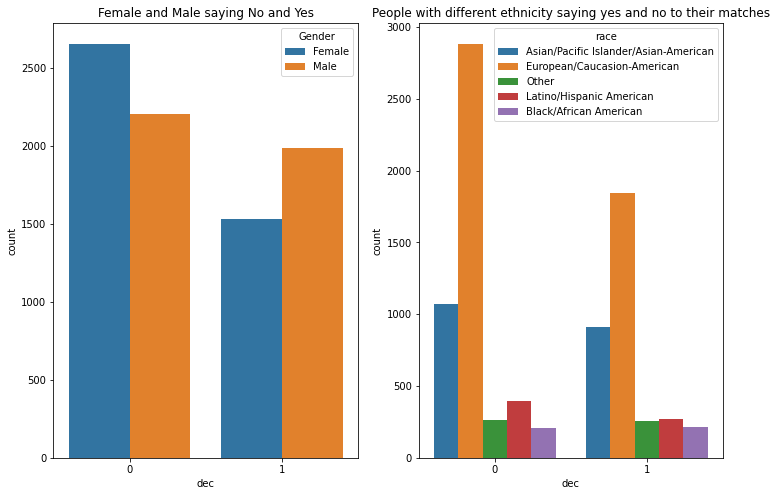

In [11]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,8])
sns.countplot(data=data, hue ="Gender", x="dec", ax=ax1).set_title("Female and Male saying No and Yes");
sns.countplot(data=data, hue ="race", x="dec", ax=ax2).set_title("People with different ethnicity saying yes and no to their matches");

cor=data.corr(method="spearman")
corr_target=abs(cor["partner rating of attributes"])
corr_target[corr_target>=0.50]

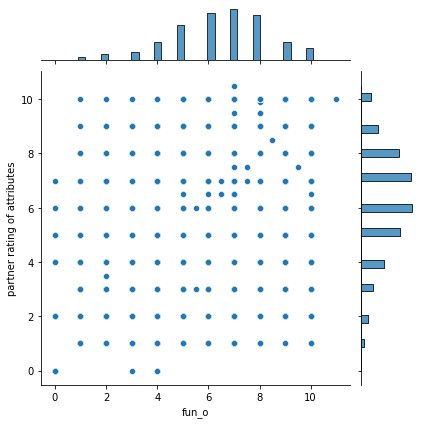

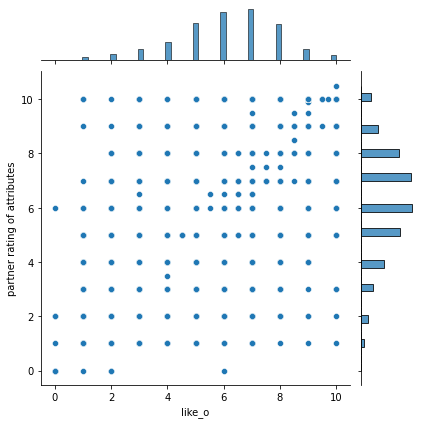

In [12]:
sns.jointplot(y="partner rating of attributes", x="fun_o", data=data);

sns.jointplot(y="partner rating of attributes", x="like_o", data=data, );

<AxesSubplot:ylabel='iid'>

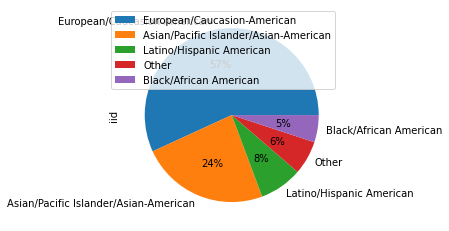

In [13]:
(
data
    .groupby(["race"])
    [["match", "iid"]]
   .count()
    .sort_values("match", ascending=False)
    .head(100)
).plot.pie(y="iid", autopct='%1.0f%%')

In [14]:
(
data
    .groupby(["field", "wave"])
    [["match"]]
   .count()
    .sort_values("match", ascending=False)
    .head(100)
)

,,match
field,wave,
MBA,14,138
International Affairs,9,120
Law,2,105
Social Work,4,90
Business,15,90
...,...,...
GS Postbacc PreMed,11,21
Mathematics,11,21
Art Education,11,21


<AxesSubplot:ylabel='None'>

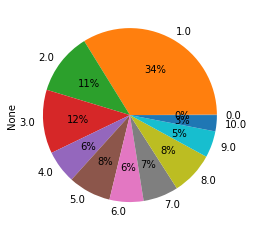

In [15]:
(data
 .groupby("race importance")
 .size()
).plot.pie(y="iid",autopct='%1.0f%%')

<AxesSubplot:ylabel='iid'>

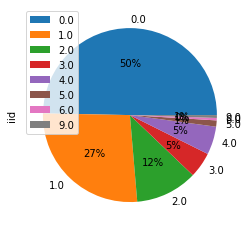

In [16]:
(data
.groupby("them_cal")
 .count()
).plot.pie(y="iid", autopct='%1.0f%%')